# Theil Sen regression

Theil Sen regression involves fitting multiple regression models on subsets of the training data and combining the coefficients together in the end.

Thiel sen regression is better than huber and RANSAC regression

In [1]:
from random import random
from random import randint
from random import seed
from numpy import arange
from numpy import mean
from numpy import std
from numpy import absolute
from sklearn.datasets import make_regression
from sklearn.linear_model import TheilSenRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold
from matplotlib import pyplot

In [2]:
seed(1)
X, y = make_regression(n_samples=100, n_features=1, tail_strength=0.9, effective_rank=1, n_informative=1, noise=3, bias=50, random_state=1)
# add some artificial outliers

for i in range(10):
  factor = randint(2, 4)
  if random() > 0.5:
    X[i] += factor * X.std()
  else:
    X[i] -= factor * X.std()

In [3]:
model = TheilSenRegressor()

In [4]:
# define model evaluation method
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
# evaluate model
scores = cross_val_score(model, X, y, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1)
# force scores to be positive
absolute(scores)

array([ 1.56029453,  2.34842728,  5.51915506,  2.51301099,  2.75699321,
        5.77745548,  6.79913654,  4.10245464,  5.29771098,  7.0300975 ,
        6.55076383,  7.3974686 ,  5.39954986,  2.2690354 ,  1.46098948,
        3.91572015,  2.54071748,  2.38372275,  1.81243079, 10.43262342,
        4.75558598,  3.92117126,  4.1167637 ,  4.36900999,  5.01838579,
        4.23263941,  4.01917062,  3.76679863,  4.72703726,  4.34738655])

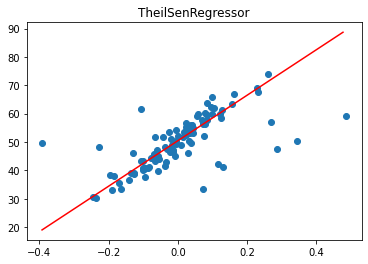

In [5]:
# fut the model on all data
model.fit(X, y)
# plot the dataset
pyplot.scatter(X, y)
# plot the line of best fit
xaxis = arange(X.min(), X.max(), 0.01)
yaxis = model.predict(xaxis.reshape((len(xaxis), 1)))
pyplot.plot(xaxis, yaxis, color='r')
# show the plot
pyplot.title(type(model).__name__)
pyplot.show()